In [1]:
# Importing Libraries
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


The dataset provided [here](http://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv) contains monthly car sales over a period of nine years.

,ds,y
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


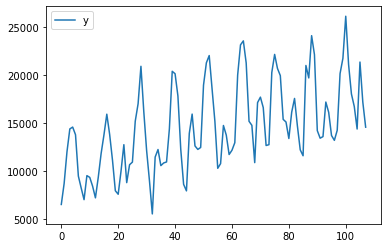

In [2]:
# Importing sales data
path = "http://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-car-sales.csv"
df = pd.read_csv(path, header=0, names=['ds', 'y'])
df.plot()
df

In [3]:
# Converting dates to YYYY-MM-DD
df['ds'] = pd.to_datetime(df['ds'])

In [4]:
df

,ds,y
0,1960-01-01,6550
1,1960-02-01,8728
2,1960-03-01,12026
3,1960-04-01,14395
4,1960-05-01,14587
...,...,...
103,1968-08-01,16722
104,1968-09-01,14385
105,1968-10-01,21342
106,1968-11-01,17180


In [5]:
# Fitting the sales data
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
# Making future dataframe
future = m.make_future_dataframe(periods=12, freq='MS')
future

,ds
0,1960-01-01
1,1960-02-01
2,1960-03-01
3,1960-04-01
4,1960-05-01
...,...
115,1969-08-01
116,1969-09-01
117,1969-10-01
118,1969-11-01


In [7]:
# Making predictions for the future dataframe
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
115,1969-08-01,14910.677085,13161.566869,16495.827998
116,1969-09-01,13024.238770,11498.816444,14632.696970
117,1969-10-01,18721.504397,17059.965261,20304.459078
118,1969-11-01,18376.308492,16794.927844,19926.257316
119,1969-12-01,15641.053500,14058.030322,17197.980259


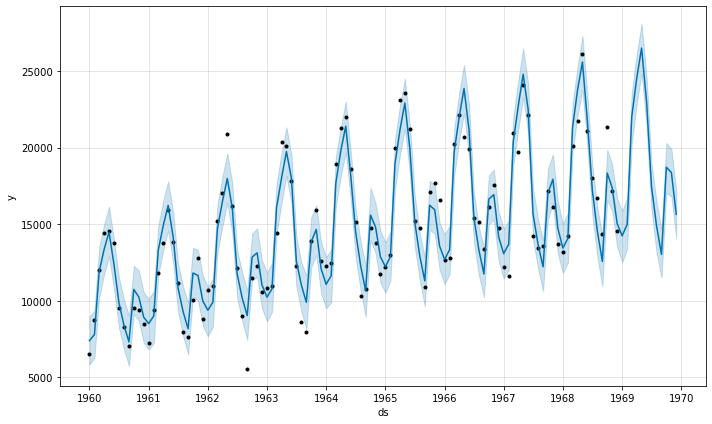

In [8]:
fig = m.plot(forecast)

In [9]:
forecast[['ds', 'yhat']].round()

,ds,yhat
0,1960-01-01,7389.0
1,1960-02-01,7793.0
2,1960-03-01,11891.0
3,1960-04-01,13367.0
4,1960-05-01,14482.0
...,...,...
115,1969-08-01,14911.0
116,1969-09-01,13024.0
117,1969-10-01,18722.0
118,1969-11-01,18376.0


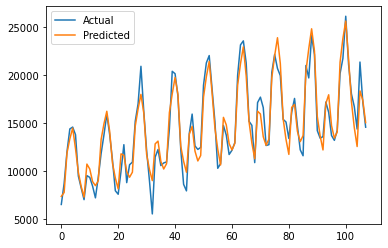

In [10]:
# Comparing results
y_true = df['y']
y_pred = forecast['yhat'][:-12]
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [11]:
# Saving file with new predictions
month = forecast['ds'].dt.strftime('%Y-%m')
sales = forecast['yhat'].astype(int)
res = pd.DataFrame({'Month':month, 'Sales':sales})
res

,Month,Sales
0,1960-01,7388
1,1960-02,7793
2,1960-03,11890
3,1960-04,13366
4,1960-05,14482
...,...,...
115,1969-08,14910
116,1969-09,13024
117,1969-10,18721
118,1969-11,18376


In [12]:
# Writing to .csv and saving file on computer
res.to_csv('res.csv', index=False)